##### Basic Deeplearning

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
# 위의 구문을 사용하지 않는 경우 tf.keras, tf.keras.layers와 같이 사용가능

In [12]:
x=np.array([1,2,3,4,5,6])
y=np.array([10,98,8,2,3,4])

tf.random.set_seed(2)

input_layer=tf.keras.layers.InputLayer(input_shape=(1,))
# (1,) 이 부분은 Dense의 가장 상단으로 입력되는 x변수의 갯수(독립변수, 특징값갯수)
hidden_layer1=tf.keras.layers.Dense(units=4,activation='relu')
hidden_layer2=tf.keras.layers.Dense(units=2,activation='relu')
output_layer=layers.Dense(units=1)  # unit 생략 가능, activation 없으면 wx+b만 동작 (선형회귀)

# 순차 처리 구조, (함수처리 구조도 있음)
model=keras.Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    output_layer    
])
# 자동으로 wx+b 수행

In [21]:
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.layers[0].output)
intermediate_output = intermediate_layer_model(x)

print("=============")
print(intermediate_output)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(6, 4), dtype=float32)


In [13]:
model.summary()
# x변수 1개 존재 -> w,b값이 들어가서 생성된 것이 2개임 (param)
# param이 8개인 이유 x 변수 하나에 w,b가 생성되므로 dense 4 * 2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 8         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.get_weights()
# [-0.37941802] : w, [0.] : b

[array([[-0.773598  , -0.07830954, -0.6027144 , -0.32230526]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.25339055,  0.9880707 ],
        [ 0.03676939,  0.5841136 ],
        [ 0.05980778, -0.7604344 ],
        [-0.9825578 , -0.6252358 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0581826],
        [-0.9491979]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
# model.fit할 때 오차역전파 하는 방법론 (최적화함수 -> optimizer)
# model.fit할 때 구축된 모델에서 계산된 값을 (y예측값) 실제 y값과 비교하는 공식(loss function -> 오차 함수)
# model.fit할 떄 화면에 출력될 사항 선택 (metrics)
model.compile(#optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

hist=model.fit(x,y,epochs=3,verbose=1) # verbose가 0이면 화면 출력x
# hist.history['loss']
list(hist.history)

Epoch 1/3


1/1 [==============================] - 0s 232ms/step - loss: 1632.8334 - accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 4ms/step - loss: 1632.7017 - accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 5ms/step - loss: 1632.6061 - accuracy: 0.0000e+00


['loss', 'accuracy']

In [16]:
hist.history['loss'], hist.history['accuracy']

([1632.8333740234375, 1632.70166015625, 1632.6060791015625], [0.0, 0.0, 0.0])

Text(0.5, 1.0, 'accuracy')

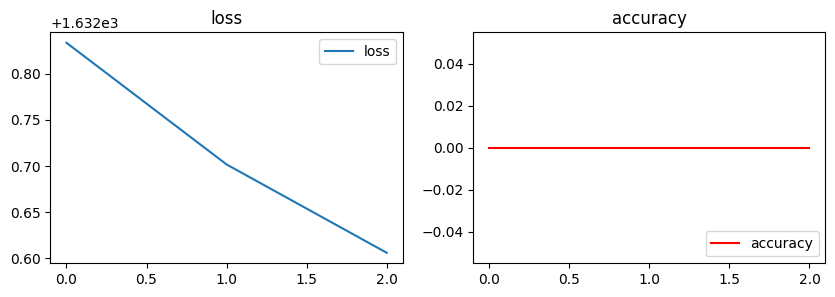

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'r', label='accuracy')
plt.legend(loc='lower right')
plt.title('accuracy')

In [18]:
model.predict(x)

array([[0.007377],
       [0.007377],
       [0.007377],
       [0.007377],
       [0.007377],
       [0.007377]], dtype=float32)

In [19]:
model.get_weights()

[array([[-0.773598  , -0.07830954, -0.6027144 , -0.32230526]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.25339055,  0.9880707 ],
        [ 0.03676939,  0.5841136 ],
        [ 0.05980778, -0.7604344 ],
        [-0.9825578 , -0.6252358 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0581826],
        [-0.9491979]], dtype=float32),
 array([0.007377], dtype=float32)]

In [20]:
model.evaluate(x,y)

1/1 [==============================] - 0s 63ms/step - loss: 1632.5259 - accuracy: 0.0000e+00


[1632.52587890625, 0.0]

In [60]:
나이=[20,30,40,57,10,25]
성별=[1,1,0,1,0,1]
성적=[2000,100,70,10,20,20]

import pandas as pd
df=pd.DataFrame({'나이':나이, '성별':성별, '성적':성적})
display(df)
x=df[['나이', '성별']].values # values에 의해 numpy로 변경됨
y=df['성적'].values

type(x)

,나이,성별,성적
0,20,1,2000
1,30,1,100
2,40,0,70
3,57,1,10
4,10,0,20
5,25,1,20


numpy.ndarray

In [61]:
# Dense(1, input_shape=(2,)) 하고 get_weights한다면
# get_we=[w,b]
# print(get_we)

w=[[1], # 나이값 w
   [5]] # 성별값 w
print(np.shape(w))
b=[0]


# w=[1,5]
# print(np.shape(w))

# w=[[1,5]]
# print(np.shape(w))

np.dot(x,w)+b # dense 1개

(2, 1)


array([[25],
       [35],
       [40],
       [62],
       [10],
       [30]], dtype=int64)

In [62]:
### epoch 2
# w,b를 epoch1의 mse값을 이용해 갱신(오차역전파,미분)

# Dense(3, input_shape=(2,))
# 최종출력물은 (6*2, 2*3) => 6*3 최종 자료
w=[[1,2,3], # 나이값 w
   [5,4,8]] # 성별값 w
print(np.shape(w))
b=[0,1,2]

hidden=np.dot(x,w)+b  # 은닉층의 출력값 6*3 -> w는 무조건 3개 있어야함
print('------hidden------')
print(hidden)

# Dense(1,)
w=[[2],
   [3],
   [3]]
b=[2]
output=np.dot(hidden,w)+b
print('------output------')
print(output)

(2, 3)
------hidden------
[[ 25  45  70]
 [ 35  65 100]
 [ 40  81 122]
 [ 62 119 181]
 [ 10  21  32]
 [ 30  55  85]]
------output------
[[ 397]
 [ 567]
 [ 691]
 [1026]
 [ 181]
 [ 482]]


In [63]:
## output 값과 실제 y값과의 비교 (오차계산)
print(output, y)

mse=np.mean((output-np.reshape(y,(-1,1)))^2)
mse

[[ 397]
 [ 567]
 [ 691]
 [1026]
 [ 181]
 [ 482]] [2000  100   70   10   20   20]


188.0

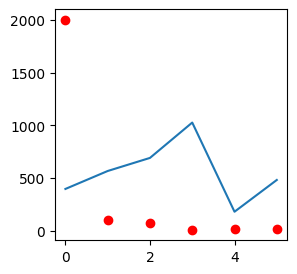

In [64]:
plt.figure(figsize=(3,3))
plt.plot(성적, 'ro')  # 실제 y값
plt.plot(output)